In [2]:
import numpy as np
import pandas as pd
import re

In [3]:
attacks1 = pd.read_csv("../../attack1.csv")
attacks1

,Unnamed: 0,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,original order,Date
0,0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0,2018
1,1,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0,2018
2,2,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0,2018
3,3,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0,2018
4,4,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,6297,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6.0,1903
6298,6298,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5.0,1903
6299,6299,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,4.0,1900-1905
6300,6300,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,3.0,1883-1889


In [4]:
attacks1 = attacks1.drop(columns=['Time','Species ','Investigator or Source', 'pdf', 'href formula', 'href','original order',"Age"])
attacks1

,Unnamed: 0,Type,Country,Area,Location,Activity,Name,Sex,Injury,Fatal (Y/N),Date
0,0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,"No injury to occupant, outrigger canoe and pad...",N,2018
1,1,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,Minor injury to left thigh,N,2018
2,2,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,Injury to left lower leg from surfboard skeg,N,2018
3,3,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,Minor injury to lower leg,N,2018
4,4,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,2018
...,...,...,...,...,...,...,...,...,...,...,...
6297,6297,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,FATAL,Y,1903
6298,6298,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,FATAL,Y,1903
6299,6299,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,FATAL,Y,1900-1905
6300,6300,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,FATAL,Y,1883-1889


Voy a limpiar la columna de Sex. Antes de nada cambiarle el nombre

In [5]:
attacks1["Sex"]=attacks1["Sex "]

In [6]:
attacks1 = attacks1.drop(columns="Sex ")

In [7]:
attacks1["Sex"].value_counts()

M      5094
F       637
M         2
N         2
lli       1
.         1
Name: Sex, dtype: int64

In [8]:
attacks1["Sex"].isnull().sum()

565

In [9]:
attacks1["Sex"] = attacks1["Sex"].fillna("NoData")

In [10]:
attacks1["Sex"].isnull().sum()

0

In [11]:
attacks1["Sex"].value_counts()

M         5094
F          637
NoData     565
M            2
N            2
lli          1
.            1
Name: Sex, dtype: int64

In [12]:
attacks1.loc[attacks1["Sex"].str.startswith("M"),"Sex"] = "M"

In [13]:
attacks1["Sex"].value_counts()

M         5096
F          637
NoData     565
N            2
lli          1
.            1
Name: Sex, dtype: int64

In [14]:
def genre(value):
    value = re.sub(r"^[^MF].*","NoData",value)
    return value

attacks1["Sex_2"] = attacks1["Sex"].apply(genre)

In [15]:
attacks1["Sex_2"].value_counts()

M         5096
F          637
NoData     569
Name: Sex_2, dtype: int64

569 de 6302 son el 9% de los datos

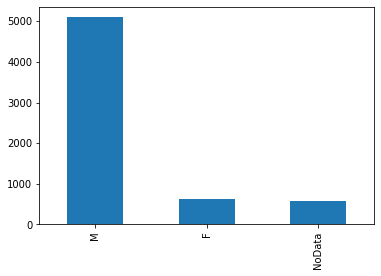

In [16]:
%matplotlib inline

attacks1["Sex_2"].value_counts().plot.bar()

A priori podría parecer que la carne de hombre es más apetecible para los tiburones. Sin embargo, vamos a comparar sex con date

In [17]:
attacks1["Date"] = attacks1["Date"].fillna("NoData")
attacks1["Date"].value_counts().sum()

6302

In [18]:
attacks1["Date"].value_counts()

2015                          143
2017                          137
2016                          131
2014                          128
2011                          127
                             ... 
1943-1945                       1
1920s                           1
1883 (probably happened Ca      1
1823                            1
1792                            1
Name: Date, Length: 321, dtype: int64

In [19]:
def date_fn(value):
    if (len(value)==4) | (value=="NoData"):
        return value
    else:
        pattern = r'\d{4}\-\d{4}.*'
        if re.match(pattern, value):
            value = value.split("-")
            value1 = value[0]
            value2 = value[1]
            value2 = re.search(r"^\d{4}", value2)
            value2 = value2.group()
            value = [int(value1),int(value2)]
            value_mean = int(sum(value)/len(value))
            return str(value_mean)
        else: 
            value = (re.search(r"^\d{4}", value)).group()
            return value


attacks1["Date_mod"] = attacks1["Date"].apply(date_fn)
attacks1["Date_mod"]

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
6297    1903
6298    1903
6299    1902
6300    1886
6301    1849
Name: Date_mod, Length: 6302, dtype: object

In [20]:
display(attacks1["Date_mod"].describe(), attacks1["Date_mod"].max(), attacks1["Date_mod"].min())
attacks1["Date_mod"].isnull().sum()

count     6302
unique     250
top       2015
freq       143
Name: Date_mod, dtype: object

'NoData'

'1543'

0

In [21]:
def date_int(value):
    if value == "NoData":
        return 0
    else:
        value = int(value)
        if value>2019:
            value=0
            return value
        else:
            return value

attacks1["Date_mod2"] = attacks1["Date_mod"].apply(date_int)

In [22]:
attacks1.loc[attacks1["Date_mod2"] == 0,"Date_mod2"] = np.nan
attacks1["Date_mod2"].isnull().sum()

20

In [23]:
attacks1["Date_mod2"].describe()

count    6282.000000
mean     1966.820917
std        48.478998
min      1543.000000
25%      1944.000000
50%      1978.000000
75%      2005.000000
max      2018.000000
Name: Date_mod2, dtype: float64

In [24]:
attacks2 = attacks1[["Date_mod2","Sex_2"]]
attacks2

,Date_mod2,Sex_2
0,2018.0,F
1,2018.0,F
2,2018.0,M
3,2018.0,M
4,2018.0,M
...,...,...
6297,1903.0,M
6298,1903.0,M
6299,1902.0,M
6300,1886.0,M


In [28]:
desdelos2000 =attacks2[(attacks2["Date_mod2"].values <1950)|(attacks2["Date_mod2"].isnull())].index
desdelos2000

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


Int64Index([4078, 4498, 4499, 4500, 4501, 4502, 4503, 4504, 4505, 4506,
            ...
            6292, 6293, 6294, 6295, 6296, 6297, 6298, 6299, 6300, 6301],
           dtype='int64', length=1745)

In [31]:
attacks2_Transp = attacks2.T

In [32]:
attacks2_Transp = attacks2_Transp.drop(columns=desdelos2000)

In [33]:
attacks2 = attacks2_Transp.T

In [34]:
attacks2

,Date_mod2,Sex_2
0,2018,F
1,2018,F
2,2018,M
3,2018,M
4,2018,M
...,...,...
6254,1957,M
6255,1956,M
6256,1956,M
6257,1956,M


In [35]:
attacks2["hombre"] = np.where(attacks2["Sex_2"].isin(["M"]), 1, 0)
attacks2["hombre"] 

0       0
1       0
2       1
3       1
4       1
       ..
6254    1
6255    1
6256    1
6257    1
6258    1
Name: hombre, Length: 4557, dtype: int64

In [36]:
attacks2["mujer"] = np.where(attacks2["Sex_2"].isin(["F"]), 1, 0)
attacks2["mujer"] 

0       1
1       1
2       0
3       0
4       0
       ..
6254    0
6255    0
6256    0
6257    0
6258    0
Name: mujer, Length: 4557, dtype: int64

In [37]:
attacks2

,Date_mod2,Sex_2,hombre,mujer
0,2018,F,0,1
1,2018,F,0,1
2,2018,M,1,0
3,2018,M,1,0
4,2018,M,1,0
...,...,...,...,...
6254,1957,M,1,0
6255,1956,M,1,0
6256,1956,M,1,0
6257,1956,M,1,0


In [38]:
nueva = pd.pivot_table(attacks2,index=['Date_mod2'],values=['hombre',"mujer"],aggfunc={'hombre': 'sum', "mujer": 'sum'})
nueva

,hombre,mujer
Date_mod2,,
1950.0,40,0
1951.0,26,2
1952.0,25,1
1953.0,28,5
1954.0,37,1
...,...,...
2014.0,95,23
2015.0,114,27
2016.0,106,21


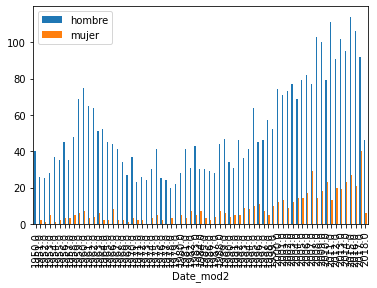

In [39]:
nueva.plot.bar()

In [40]:
from2000=attacks2[(attacks2["Date_mod2"].values <2000)|(attacks2["Date_mod2"].isnull())].index
from2000

Int64Index([2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088,
            ...
            6249, 6250, 6251, 6252, 6253, 6254, 6255, 6256, 6257, 6258],
           dtype='int64', length=2465)

In [46]:
attacks2 = attacks2.drop(from2000)
attacks2

,Date_mod2,Sex_2,hombre,mujer
0,2018,F,0,1
1,2018,F,0,1
2,2018,M,1,0
3,2018,M,1,0
4,2018,M,1,0
...,...,...,...,...
6206,2012,F,0,1
6210,2006,M,1,0
6211,2003,M,1,0
6212,2004,NoData,0,0


In [47]:
nueva = pd.pivot_table(attacks2,index=['Date_mod2'],values=['hombre',"mujer"],aggfunc={'hombre': 'sum', "mujer": 'sum'})
nueva

,hombre,mujer
Date_mod2,,
2000.0,74,12
2001.0,71,13
2002.0,73,9
2003.0,77,12
2004.0,69,14
2005.0,79,14
2006.0,82,17
2007.0,77,29
2008.0,103,14


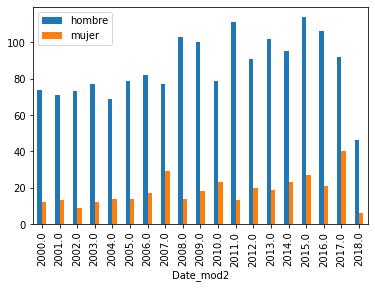

In [48]:
nueva.plot.bar()